In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_name = "kc_house_data.csv"
df = pd.read_csv(file_name)

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
for col in df.columns:
    print(f"Column: {col}")
    print(f"Unique values count: {df[col].nunique()}")
    print(f"Unique values: {df[col].unique()[:10]}")  # shows only first 10 to avoid long lists
    print("-" * 40)

Column: id
Unique values count: 21436
Unique values: [7129300520 6414100192 5631500400 2487200875 1954400510 7237550310
 1321400060 2008000270 2414600126 3793500160]
----------------------------------------
Column: date
Unique values count: 372
Unique values: ['2014-10-13T00:00:00.000000000' '2014-12-09T00:00:00.000000000'
 '2015-02-25T00:00:00.000000000' '2015-02-18T00:00:00.000000000'
 '2014-05-12T00:00:00.000000000' '2014-06-27T00:00:00.000000000'
 '2015-01-15T00:00:00.000000000' '2015-04-15T00:00:00.000000000'
 '2015-03-12T00:00:00.000000000' '2015-04-03T00:00:00.000000000']
----------------------------------------
Column: price
Unique values count: 4028
Unique values: [ 221900.  538000.  180000.  604000.  510000. 1225000.  257500.  291850.
  229500.  323000.]
----------------------------------------
Column: bedrooms
Unique values count: 13
Unique values: [3 2 4 5 1 6 7 0 8 9]
----------------------------------------
Column: bathrooms
Unique values count: 30
Unique values: [1.   2.

In [9]:
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['floors'] = df['floors'].astype('category')

In [10]:
df['zipcode'] = df['zipcode'].astype('category')

In [11]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                category
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
import seaborn as sns
# Function to find and print outliers in each column based on IQR method
def find_outliers(df, cols):
    outliers = {}
    for col in cols:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the outliers in the column
        outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        # Check if there are any outliers
        if not outlier_values.empty:
            outliers[col] = outlier_values.tolist()
        else:
            print(f"No outliers detected in column '{col}'")

    return outliers

# List of numerical columns that need outlier detection
outlier_cols = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'sqft_above',
    'sqft_basement',
    'sqft_living15',
    'sqft_lot15'
]

# Store the original data before capping
df_original = df.copy()

# Identify and print outliers before capping
outliers = find_outliers(df, outlier_cols)

# Print outliers for each column
if outliers:
    for col, outlier_values in outliers.items():
        print(f"\nOutliers in column '{col}':")
        print(outlier_values)
else:
    print("\nNo outliers detected in any column.")


Outliers in column 'price':
[1225000.0, 2000000.0, 1350000.0, 1325000.0, 1450000.0, 2250000.0, 1505000.0, 2400000.0, 2900000.0, 1365000.0, 2050000.0, 3075000.0, 2384000.0, 1384000.0, 1400000.0, 1350000.0, 1550000.0, 1300000.0, 1450000.0, 1199000.0, 1150000.0, 1385000.0, 1280000.0, 1197350.0, 1485000.0, 2250000.0, 1600000.0, 2125000.0, 1450000.0, 1950000.0, 1220000.0, 3070000.0, 1250000.0, 1145000.0, 1484900.0, 1578000.0, 1300000.0, 1310000.0, 2250000.0, 1355000.0, 1216000.0, 2400000.0, 1270000.0, 1200000.0, 1321500.0, 2450000.0, 1242500.0, 1570000.0, 1200000.0, 1278000.0, 1955000.0, 1750000.0, 5110800.0, 1150000.0, 1875000.0, 1225000.0, 2300000.0, 2260000.0, 5300000.0, 1200000.0, 2200000.0, 1131000.0, 1175000.0, 1700000.0, 1400000.0, 2537000.0, 1355000.0, 1229000.0, 5350000.0, 1328000.0, 1218000.0, 1250000.0, 1300000.0, 1175000.0, 1375000.0, 1150000.0, 1198000.0, 2250000.0, 1230000.0, 1265000.0, 1679000.0, 1928000.0, 1175000.0, 2350000.0, 1135000.0, 1315000.0, 1430000.0, 1525000.0, 15

In [13]:
# Apply capping to the DataFrame
def cap_outliers(df, cols):
    for col in cols:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values below the lower bound and above the upper bound
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply capping
df_capped = cap_outliers(df.copy(), outlier_cols)

# Check the shape before and after capping outliers
print("\nOriginal shape:", df_original.shape)
print("After capping outliers:", df_capped.shape)


Original shape: (21613, 21)
After capping outliers: (21613, 21)


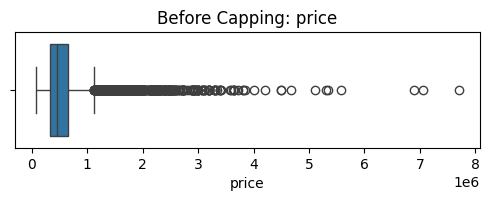

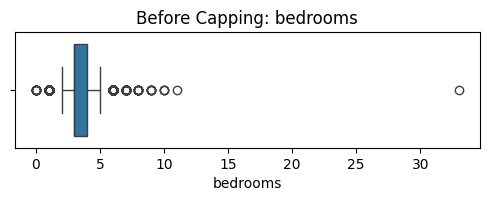

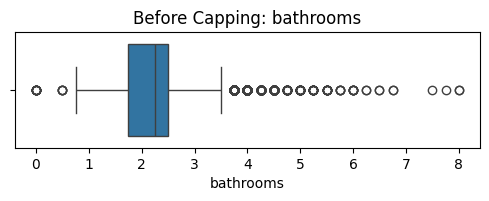

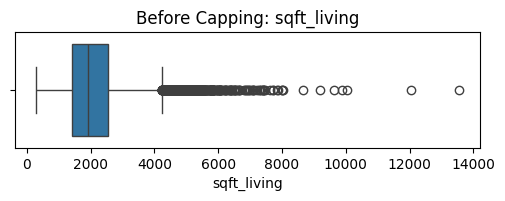

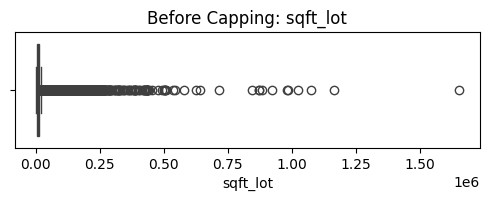

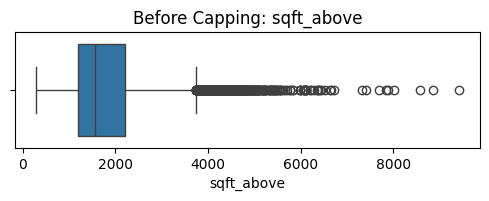

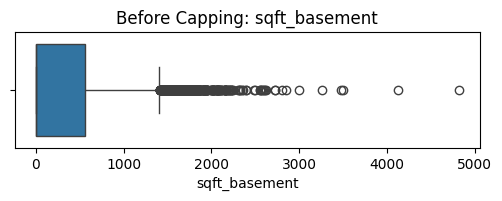

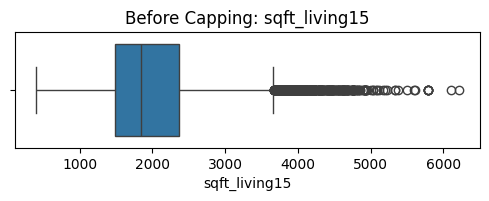

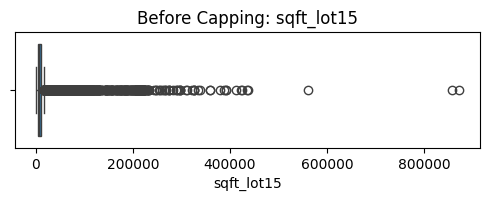

In [14]:
# Plot boxplots before capping outliers (using the original DataFrame)
for col in outlier_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_original[col])  # Plot the original data
    plt.title(f'Before Capping: {col}')
    plt.show()


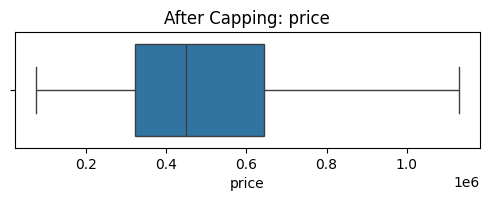

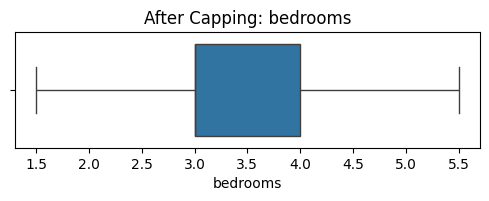

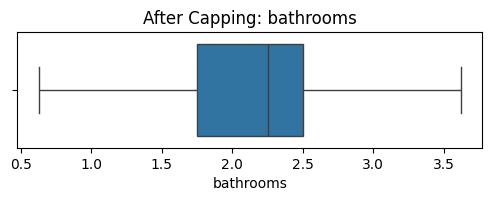

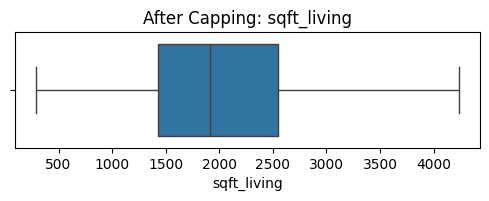

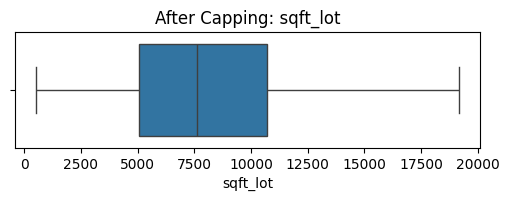

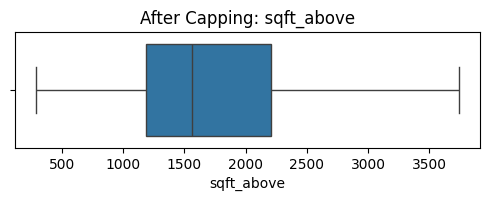

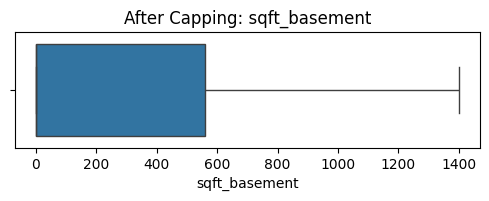

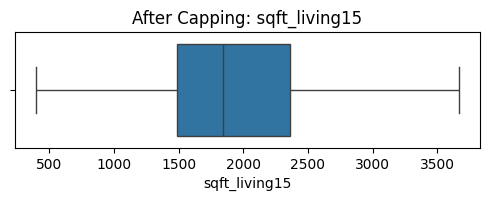

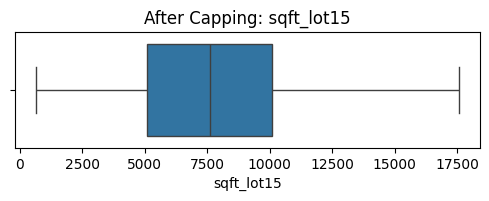

In [15]:
# Plot boxplots after capping outliers (using the capped DataFrame)
for col in outlier_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_capped[col])  # Plot the capped data
    plt.title(f'After Capping: {col}')
    plt.show()

In [16]:
data=df_capped.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  category      
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [17]:
#Extract month and year from the 'date' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  category      
 8   waterfront     21613 non-null  category      
 9   view           21613 non-null  category      
 10  condition      21613 non-null  category      
 11  grade          21613 non-null  category      
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [19]:
# Drop unnecessary columns
X = df.drop(columns=['id', 'date', 'price'])  # keep 'year' and 'month'
y = df['price']

In [20]:
# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

In [21]:
from sklearn.preprocessing import StandardScaler
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 6. Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"Score: {r2:.4f}")

RMSE: 156,988.86
Score: 0.8370


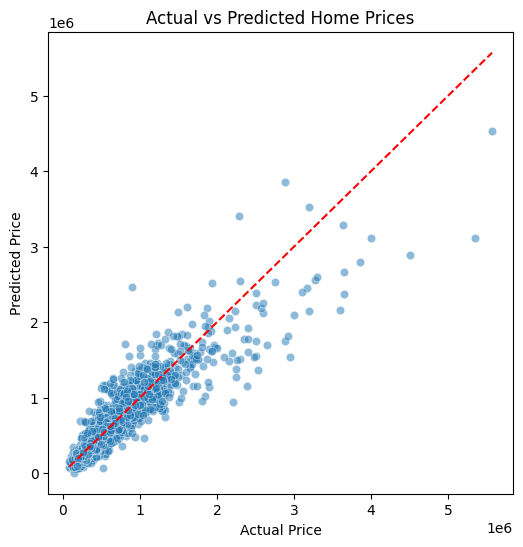

In [27]:
# 8. Visual Diagnostics
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Home Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()